In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit
import uncertainties.unumpy as un

import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 7 - Cavitação valv. sucção/dados_7.xlsx', sheet_name='instr')
#Info medidas -> var pressão
df_med = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 7 - Cavitação valv. sucção/dados_7.xlsx')

#Incerteza do tipo A
ze = fk.incert_A(df_inst.ze.values) / 100  #m
zs = fk.incert_A(df_inst.zs.values) / 100
De = fk.incert_A(df_inst.De.values) / 1000
Ds = fk.incert_A(df_inst.Ds.values) / 1000
Drot = fk.incert_A(df_inst.D.values) / 100

#Incerteza do tipo B - a/raiz(3)
pe = un.uarray(df_med.pe.values, (abs(df_med.pe).values*0.05)/np.sqrt(3)) * 98066.5 #Pa
ps = un.uarray(df_med.ps.values, (df_med.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
Q = un.uarray(df_med.Q.values, (df_med.Q.values*0.02)/np.sqrt(3)) #m^3/h
w = un.uarray(df_med.w.values, (df_med.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Fox dados -> agua
#pv = 4.25e3 #Pa [pressão de vapor a 25ºC]
pv = 2.3e3 #Pa [pressão de vapor a 20ºC]

def func_cavitation(Pe, Ve):
    Pa = Pe + 101325 #Pa
    return ((Pa - pv)/(fk.rho_agua*fk.g)) + (Ve**2)/2*fk.g

In [2]:
b1  = fk.bomba(pe, ps, fk.Q2v(Q, De), fk.Q2v(Q, Ds), ze, zs)

### Calculando NSPH para cavitação

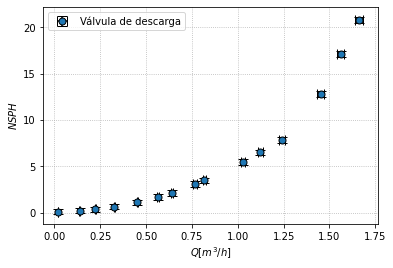

In [3]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$NSPH$', xlabel=r'$Q [m^3/h]$')

NSPH = func_cavitation(pe, fk.Q2v(Q, De))
NSPH0 = func_cavitation(pe, fk.Q2v(0, De))

fk.error(fk.Q2v(Q, De), NSPH, 'o', 'Válvula de descarga', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Q_x_NSPH.pdf', bbox_inches='tight')

In [4]:
xx = pd.DataFrame({'Q':fk.Q2v(Q, De), 'NPSH':NSPH, 'NPSH0':NSPH0})
print(xx.to_latex(index=0))

\begin{tabular}{lll}
\toprule
                 Q &          NPSH &        NPSH0 \\
\midrule
     1.661+/-0.019 &  20.85+/-0.33 &  7.32+/-0.08 \\
     1.561+/-0.018 &  17.17+/-0.31 &  5.21+/-0.14 \\
     1.451+/-0.017 &  12.84+/-0.33 &  2.50+/-0.22 \\
     1.241+/-0.014 &   7.85+/-0.33 &  0.30+/-0.28 \\
     1.124+/-0.013 &   6.49+/-0.32 &  0.30+/-0.28 \\
     1.027+/-0.012 &   5.47+/-0.31 &  0.30+/-0.28 \\
     0.818+/-0.010 &   3.48+/-0.30 &  0.20+/-0.29 \\
     0.767+/-0.009 &   3.08+/-0.29 &  0.20+/-0.29 \\
     0.641+/-0.007 &   2.12+/-0.29 &  0.10+/-0.29 \\
     0.565+/-0.007 &   1.66+/-0.29 &  0.10+/-0.29 \\
     0.453+/-0.005 &   1.11+/-0.29 &  0.10+/-0.29 \\
     0.327+/-0.004 &   0.62+/-0.29 &  0.10+/-0.29 \\
   0.2242+/-0.0026 &   0.34+/-0.29 &  0.10+/-0.29 \\
   0.1383+/-0.0016 &   0.19+/-0.29 &  0.10+/-0.29 \\
 0.02096+/-0.00024 &   0.10+/-0.29 &  0.10+/-0.29 \\
\bottomrule
\end{tabular}



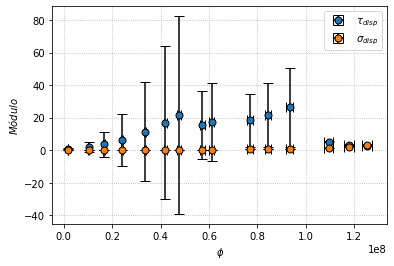

In [5]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$Módulo$', xlabel=r'$\phi$')

NSPH0 = func_cavitation(pe, fk.Q2v(0, De))

fk.error(b1.phi(Q, w, De), NSPH/NSPH0, 'o', r'$\tau_{disp}$', ax)
fk.error(b1.phi(Q, w, De), NSPH/b1.hu, 'o', r'$\sigma_{disp}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('phi_x_NSPH.pdf', bbox_inches='tight')

In [6]:
xx = pd.DataFrame({'tau':NSPH/NSPH0, 'sigma': NSPH/b1.hu, 'phi':b1.phi(Q, w, De), 'nqu':b1.nq_u(Q, w)})
print(xx.to_latex(index=0))

\begin{tabular}{llll}
\toprule
         tau &          sigma &                  phi &           nqu \\
\midrule
 2.85+/-0.05 &    3.29+/-0.09 &  (1.253+/-0.021)e+08 &   166.1+/-3.2 \\
 3.29+/-0.08 &    2.01+/-0.06 &  (1.178+/-0.019)e+08 &   128.7+/-2.5 \\
   5.1+/-0.4 &    1.20+/-0.05 &  (1.094+/-0.018)e+08 &   105.3+/-2.2 \\
     26+/-24 &    0.66+/-0.04 &    (9.33+/-0.15)e+07 &    89.5+/-2.0 \\
     22+/-20 &    0.56+/-0.04 &    (8.44+/-0.14)e+07 &    87.2+/-2.0 \\
     18+/-16 &    0.47+/-0.04 &    (7.69+/-0.13)e+07 &    83.6+/-1.9 \\
     18+/-24 &    0.32+/-0.04 &    (6.11+/-0.10)e+07 &    79.2+/-1.9 \\
     16+/-21 &    0.29+/-0.04 &    (5.72+/-0.09)e+07 &    78.5+/-1.9 \\
 (2+/-6)e+01 &  0.200+/-0.033 &    (4.77+/-0.08)e+07 &    71.5+/-1.7 \\
 (2+/-5)e+01 &  0.157+/-0.032 &    (4.19+/-0.07)e+07 &    67.2+/-1.6 \\
     11+/-30 &  0.105+/-0.030 &    (3.36+/-0.06)e+07 &    60.3+/-1.5 \\
      6+/-16 &  0.059+/-0.029 &    (2.42+/-0.04)e+07 &    51.4+/-1.2 \\
       4+/-7 &  0.033+/-

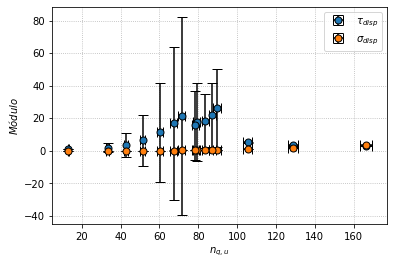

In [7]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$Módulo$', xlabel=r'$n_{q, u}$')

fk.error(b1.nq_u(Q, w), NSPH/NSPH0, 'o', r'$\tau_{disp}$', ax)
fk.error(b1.nq_u(Q, w), NSPH/b1.hu, 'o', r'$\sigma_{disp}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('n_x_NSPH.pdf', bbox_inches='tight')